In [1]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from joblib import dump
from preprocess import prep_data
from joblib import load

import matplotlib

In [2]:
df = pd.read_csv(("fish_participant.csv"))

In [3]:
X, y = prep_data(df)

In [4]:
wrf = RandomForestClassifier(class_weight = "balanced")
wrf.fit(X, y)

# nb = GaussianNB()
# nb.fit(X, y)

# lr = LinearRegression()
# lr.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
dump(wrf, "wrf_jl.joblib")

['wrf_jl.joblib']

In [6]:
def predict_from_csv(path_to_csv):

    df = pd.read_csv(path_to_csv)
    X, y = prep_data(df)

#     reg = load("wrf_v1.joblib")
#     reg = load("gnb_jl.joblib")
#     reg = load("lr_jl.joblib")
    reg = load("wrf_jl.joblib")


    predictions = reg.predict(X)

    return predictions

In [7]:
if __name__ == "__main__":
    predictions = predict_from_csv(("fish_holdout_demo.csv"))
    print(predictions)
    print(pd.read_csv("fish_holdout_demo.csv")["Weight"].values)

[ 140  150    9  430  456  169  567    8  340  320  500  188  260   70
  363  500    5  700  125   87  272 1000  170 1000  720 1100  100  160]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]


In [8]:
df_fish_comp = pd.read_csv("fish_holdout_demo.csv")
df_fish_comp["Predicted Weight"] = predictions
df_fish_comp

,Species,Weight,Length1,Length2,Length3,Height,Width,Predicted Weight
0,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944,140
1,Parkki,150.0,18.4,20.0,22.4,8.8928,3.2928,150
2,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484,9
3,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765,430
4,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225,456
5,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352,169
6,Pike,567.0,43.2,46.0,48.7,7.7920,4.8700,567
7,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852,8
8,Bream,340.0,29.5,32.0,37.3,13.9129,5.0728,340
9,Perch,320.0,27.8,30.0,31.6,7.6156,4.7716,320


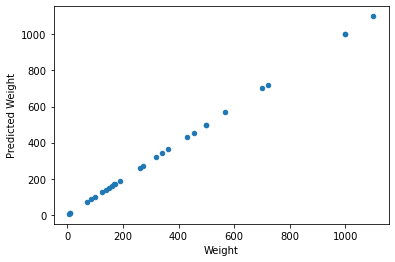

In [9]:
ax1 = df_fish_comp.plot.scatter(x="Weight", y="Predicted Weight")